Importing the required libraries

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

When the disk is rotating at a fixed angular velocity

In [112]:
_time = np.arange(0, 2, 0.01)
_fixed_omega = 2*np.pi
_fixed_omega_t = _fixed_omega*_time
_fixed_disp = _fixed_omega_t.cumsum() * 0.01 # displacement in radians

In [113]:
np.rad2deg(_fixed_disp.max())

716.4

In [114]:
for idx, i in enumerate(_fixed_disp):
    if np.mod(i, 2*np.pi) < 0.01:
        print(i, idx, np.mod(i, 2*np.pi), _time[idx])

0.0 0 0.0 0.0
0.0006283185307179587 1 0.0006283185307179587 0.01
0.001884955592153876 2 0.001884955592153876 0.02
0.0037699111843077517 3 0.0037699111843077517 0.03
0.006283185307179587 4 0.006283185307179587 0.04
0.00942477796076938 5 0.00942477796076938 0.05
6.2900968110174835 141 0.006911503837897293 1.41


In [115]:
np.mod(25.132741228718345, 2*np.pi)

0.0

In [116]:
np.rad2deg(311.0176727053895)

17819.999999999996

Defnining the constants

In [117]:
_time = np.arange(0, 1, 0.01)
_omega_o = 400 * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_phi = 5
_lamda = 2.5

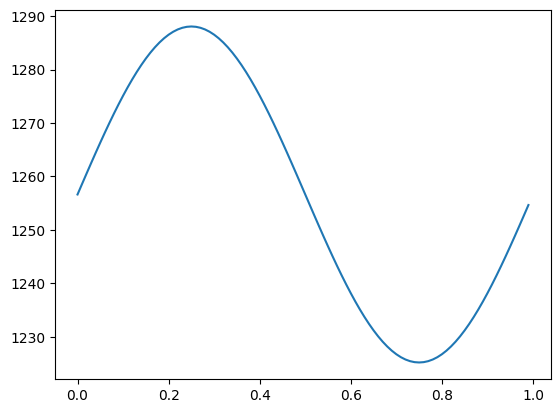

In [118]:
plt.plot(_time, _omega_t)

In [119]:
_disp = integrate.cumtrapz(_omega_t, _time, initial=0)

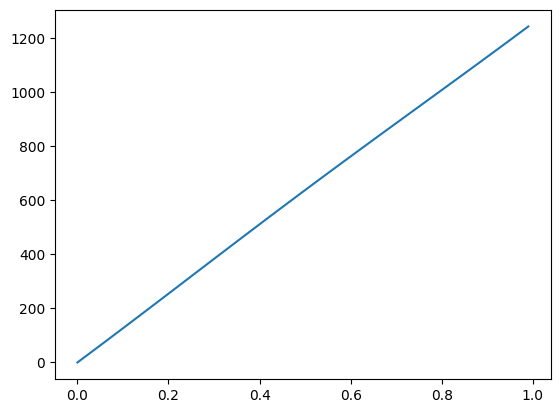

In [120]:
plt.plot(_time, _disp)